In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## Univariate Analysis

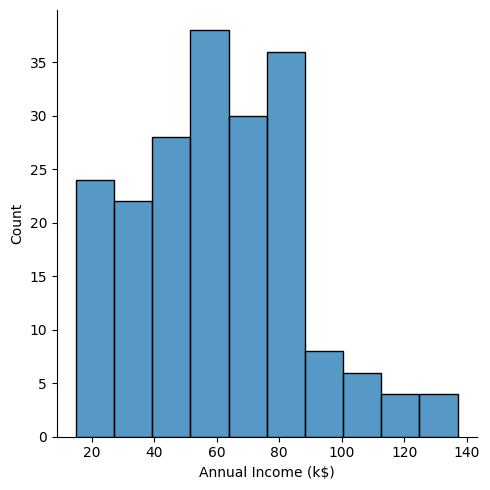

In [6]:
sns.displot(df["Annual Income (k$)"])

<AxesSubplot:>

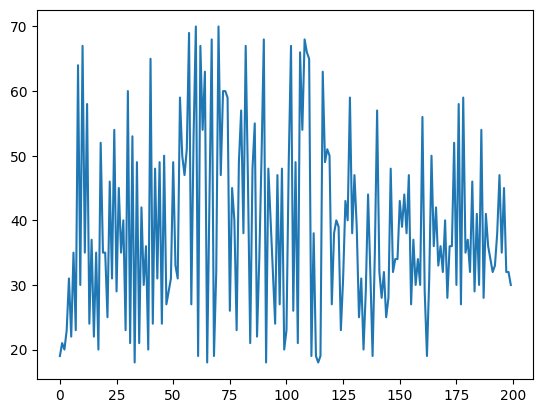

In [7]:
df.Age.plot()

## Bi-variate Analysis

<AxesSubplot:>

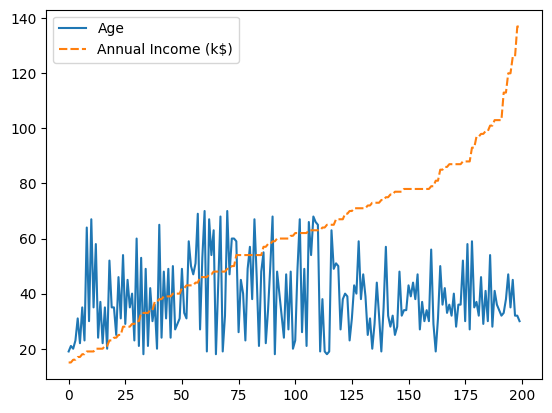

In [8]:
sns.lineplot([df.Age,df['Annual Income (k$)']])

## Mulitivariate Analysis

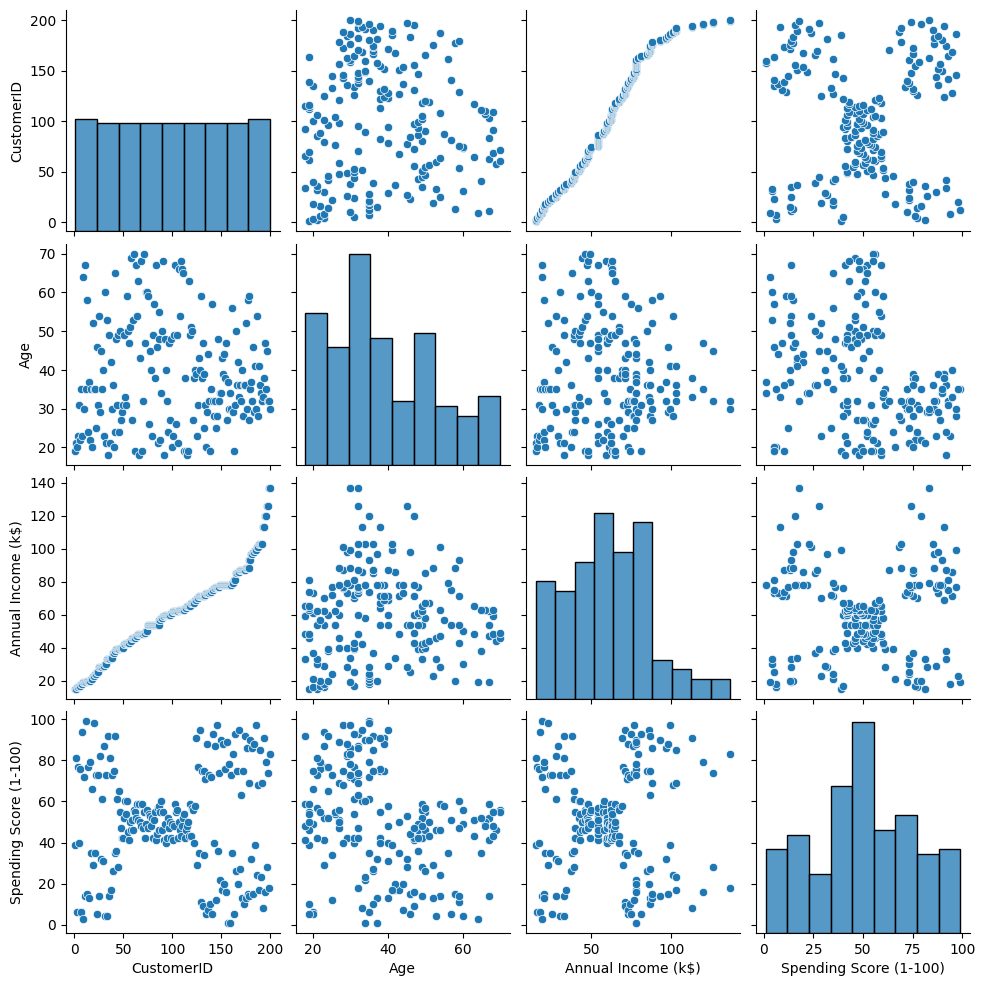

In [9]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

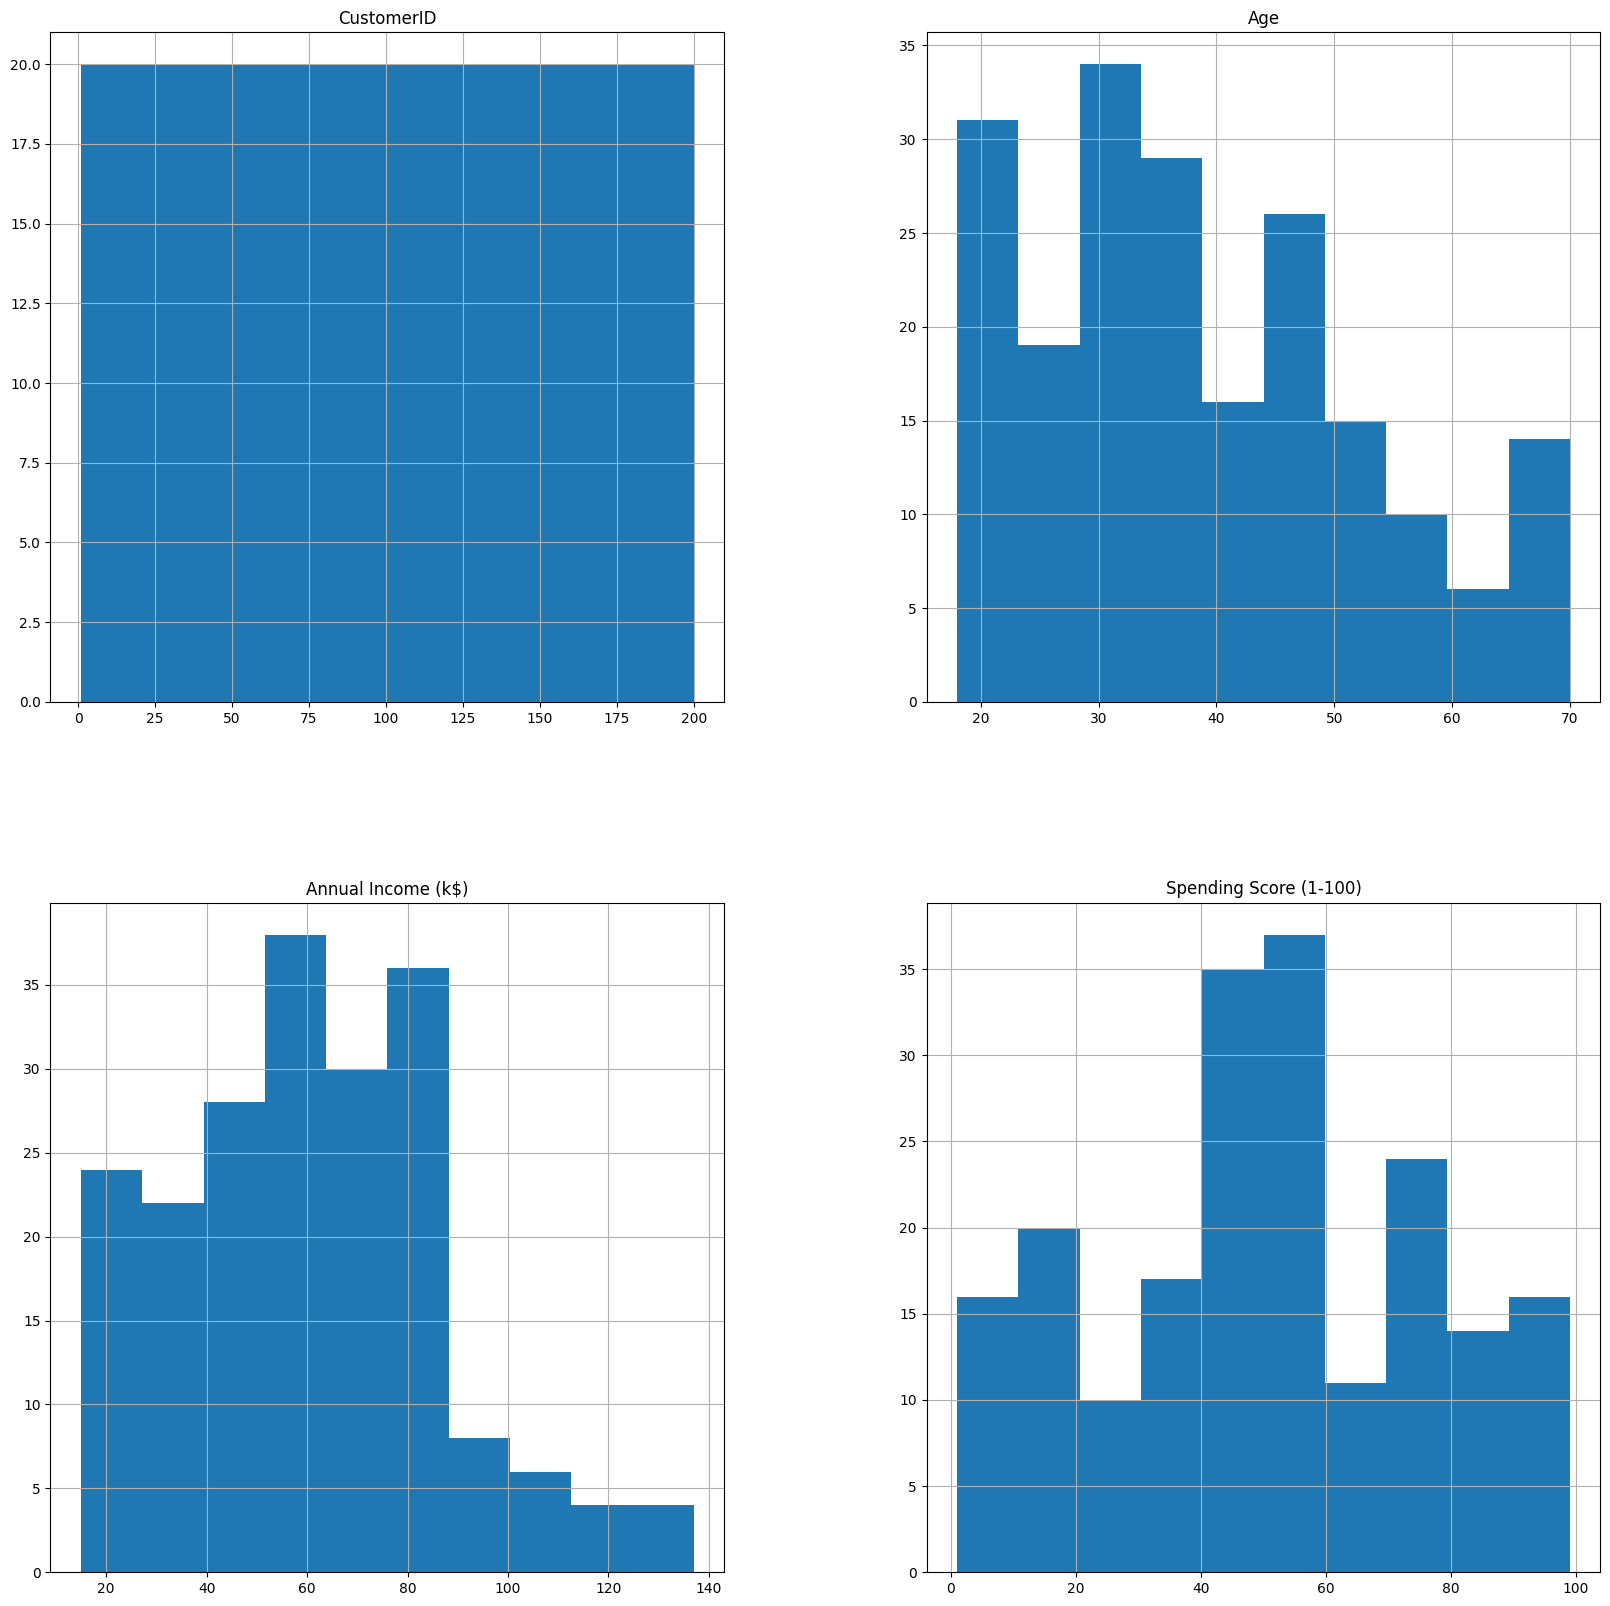

In [10]:
df.hist(figsize=(20,20))

<AxesSubplot:>

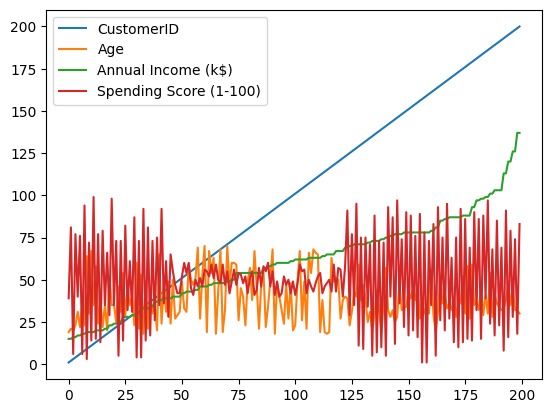

In [11]:
df.plot()

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Outlier Detection

In [16]:
df.shape

(200, 5)

<AxesSubplot:>

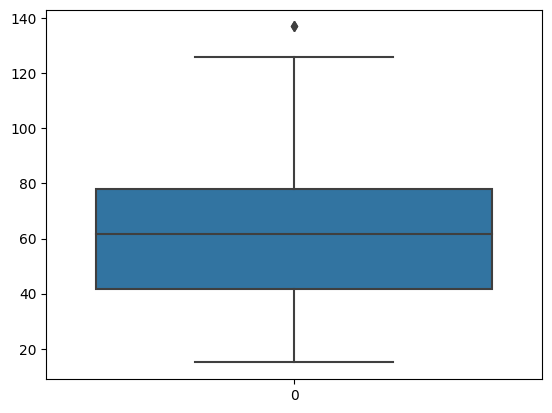

In [17]:
sns.boxplot(df["Annual Income (k$)"])

In [18]:
q1=df["Annual Income (k$)"].quantile(0.25)  
q3=df["Annual Income (k$)"].quantile(0.75)
q1


41.5

In [19]:
q3


78.0

In [20]:
IQR=q3-q1

In [21]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [22]:
upper_limit

132.75

In [23]:
lower_limit

-13.25

In [24]:
df.median()

C:\Users\nojma\AppData\Local\Temp\ipykernel_10788\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [25]:
df["Annual Income (k$)"]= np.where(df["Annual Income (k$)"]>upper_limit,61.5,df["Annual Income (k$)"])

<AxesSubplot:>

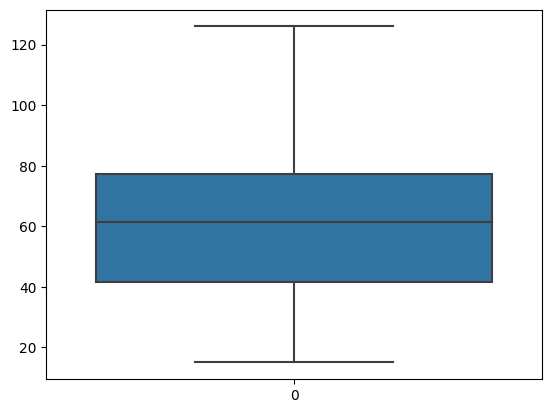

In [26]:
sns.boxplot(df["Annual Income (k$)"])

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


## labal encoding

In [28]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
df.Gender=le.fit_transform(df.Gender)

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


## Scaling

In [33]:
from sklearn.preprocessing import scale

In [34]:
_scaled=pd.DataFrame(scale(df))
_scaled.head()

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.788777,-0.434801
1,-1.706091,1.128152,-1.281035,-1.788777,1.195704
2,-1.688771,-0.886405,-1.352802,-1.748853,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.748853,1.040418
4,-1.654129,-0.886405,-0.563369,-1.708930,-0.395980


In [35]:
_scaled.shape

(200, 5)

## clustering

In [36]:
from sklearn import cluster

In [37]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(_scaled)
    error.append(kmeans.inertia_)

In [38]:
error

[1000.0,
 713.7506646771346,
 572.9155399564277,
 457.88261833636204,
 389.5702258329398,
 335.3018544918028,
 294.16343688663795,
 253.65270325868175,
 221.1708483707301,
 187.7686826517626]

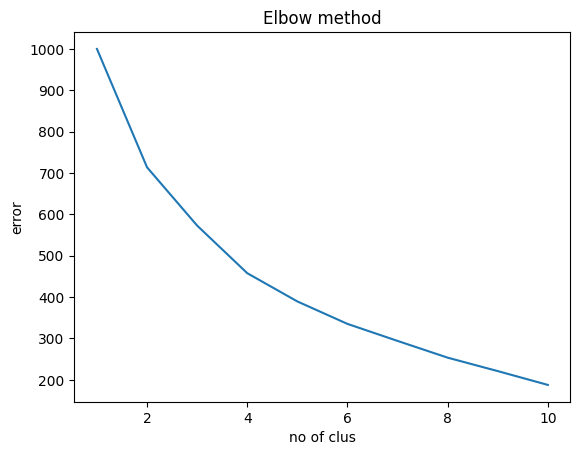

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [40]:
km_model=cluster.KMeans(n_clusters=4,init='k-means++',random_state=0)

In [41]:
km_model.fit(_scaled)

KMeans(n_clusters=4, random_state=0)

In [42]:
ykmeans =km_model.predict(_scaled)
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 2, 1, 1, 1, 3, 3, 3, 3, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [43]:
km_model.predict([[-1.723412 ,1.128152 ,-1.424569 ,-1.788777 ,-0.434801]])

array([1])

In [44]:
_scaled['kmclus'] = pd.Series(ykmeans)

In [45]:
_scaled.head()

,0,1,2,3,4,kmclus
0,-1.723412,1.128152,-1.424569,-1.788777,-0.434801,1
1,-1.706091,1.128152,-1.281035,-1.788777,1.195704,1
2,-1.688771,-0.886405,-1.352802,-1.748853,-1.715913,1
3,-1.671450,-0.886405,-1.137502,-1.748853,1.040418,1
4,-1.654129,-0.886405,-0.563369,-1.708930,-0.395980,1


In [46]:
X= _scaled.iloc[:,:-1]
X

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.788777,-0.434801
1,-1.706091,1.128152,-1.281035,-1.788777,1.195704
2,-1.688771,-0.886405,-1.352802,-1.748853,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.748853,1.040418
4,-1.654129,-0.886405,-0.563369,-1.708930,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.403201,1.118061
196,1.671450,-0.886405,0.441365,2.642742,-0.861839
197,1.688771,1.128152,-0.491602,2.642742,0.923953
198,1.706091,1.128152,-0.491602,0.067670,-1.250054


In [47]:
y=_scaled.kmclus
y

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    2
197    0
198    2
199    0
Name: kmclus, Length: 200, dtype: int32

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [49]:
x_train.shape

(160, 5)

In [50]:
y_train.shape

(160,)

In [51]:
x_test.shape

(40, 5)

In [52]:
y_test.shape

(40,)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
pred_test= model.predict(x_test)
pred_test

array([1, 3, 3, 3, 2, 2, 1, 1, 1, 2, 0, 3, 1, 3, 3, 3, 0, 1, 2, 3, 1, 1,
       3, 1, 1, 2, 1, 3, 0, 1, 1, 0, 2, 0, 2, 1, 2, 3, 1, 2])

In [57]:
pred_train = model.predict(x_train)
pred_train

array([3, 3, 0, 1, 3, 1, 1, 1, 0, 2, 3, 0, 3, 3, 1, 0, 0, 3, 0, 2, 3, 3,
       1, 3, 1, 1, 0, 1, 1, 3, 3, 1, 0, 2, 2, 1, 3, 3, 3, 1, 2, 3, 1, 0,
       0, 1, 3, 2, 0, 1, 1, 3, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 3,
       3, 2, 1, 2, 1, 0, 3, 1, 3, 0, 1, 2, 3, 3, 3, 3, 0, 2, 0, 1, 2, 0,
       2, 3, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3, 0, 0, 1, 2, 3, 1, 1, 0, 3, 3,
       1, 3, 3, 1, 3, 1, 0, 1, 0, 0, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 3, 1,
       3, 1, 2, 0, 3, 3, 1, 3, 2, 0, 2, 0, 2, 3, 1, 2, 1, 2, 3, 0, 2, 2,
       3, 0, 0, 3, 2, 1])

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [59]:
print("testing accuracy:",accuracy_score(y_test,pred_test))
print("training accuracy:",accuracy_score(y_train,pred_train))

testing accuracy: 0.975
training accuracy: 0.99375


In [60]:
# Confusion matrix

pd.crosstab(y_test,pred_test)

col_0,0,1,2,3
kmclus,,,,
0,5,0,0,0
1,0,15,0,1
2,0,0,9,0
3,0,0,0,10


In [61]:
confusion_matrix(y_test,pred_test)

array([[ 5,  0,  0,  0],
       [ 0, 15,  0,  1],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 10]], dtype=int64)

In [62]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         9
           3       0.91      1.00      0.95        10

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.98        40

